In [1]:
import os, sys
import glob
import pandas as pd
import natsort
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn')

# Extract eye-gaze data based on scene

In [2]:
def get_files(pattern):
    """
    Extracts file in alphanumerical order that match the provided pattern
    """
    if isinstance(pattern, list):
        pattern = os.path.join(*pattern)
        
    files = natsort.natsorted(glob.glob(pattern))
    if not files:
        raise FileNotFoundError('Pattern could not detect file(s)')
        
    return files

Load in one subject's eye-tracking data:

In [3]:
data_path = '/Users/xxie/hack/neuromatch/datasets/study_forrest'

sub = '01'
mod = 'recording-eyegaze_physio'

sample_files = get_files(data_path + '/sub-{}/*_physio.tsv'.format(sub))
eyedf = pd.read_csv(sample_files[0], sep='\t', names = ['x', 'y', 'dil', 'frame'])
eyedf.describe()

,x,y,dil,frame
count,884951.000000,884951.000000,902029.000000,902029.000000
mean,645.929251,264.699422,1268.730623,11277.890645
std,201.535113,114.777151,251.186395,6509.522215
min,-41.600000,-968.100000,0.000000,1.000000
25%,506.300000,180.300000,1161.000000,5640.000000
50%,654.400000,251.600000,1263.000000,11278.000000
75%,781.200000,337.200000,1389.000000,16915.000000
max,1343.100000,728.900000,2338.000000,22551.000000


In [11]:
eyedf.head()

,x,y,dil,frame,time
0,786.0,501.8,1246.0,1,0.000
1,782.9,504.8,1250.0,1,0.001
2,777.3,508.0,1251.0,1,0.002
3,774.9,508.2,1253.0,1,0.003
4,775.2,506.4,1254.0,1,0.004


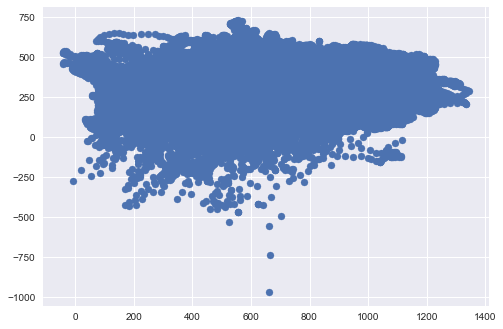

In [4]:
plt.scatter(eyedf['x'], eyedf['y'])

Sampling and frames information, make a time vector out of 1000Hz data:

In [5]:
sampling_freq = 1000  # 1000Hz eye gaze recording
fps = 25  # movie sampling rate
fadeinframes = 25
fadeoutframes = 100

tvec = eyedf.index.values/sampling_freq
# append the tvec to dataframe as time column
eyedf['time'] = (tvec)
eyedf.head()

,x,y,dil,frame,time
0,786.0,501.8,1246.0,1,0.000
1,782.9,504.8,1250.0,1,0.001
2,777.3,508.0,1251.0,1,0.002
3,774.9,508.2,1253.0,1,0.003
4,775.2,506.4,1254.0,1,0.004


In [6]:
mov_dur = eyedf['time'].values[-1]/60
print(f'Recording length is {mov_dur:.2f} minutes')

Recording length is 15.03 minutes


Load in movie transcript, check scene times vs. recording times:

In [7]:
movdf = pd.read_csv('../../data/studyforrest_german_audio_transcript.csv', names=['start', 'end', 'transcript'])
movdf.describe()

,start,end
count,573.000000,573.000000
mean,3580.439058,3583.834206
std,2054.162017,2054.015837
min,1.300000,10.500000
25%,1697.600000,1698.800000
50%,3519.500000,3524.200000
75%,5391.700000,5396.300000
max,7083.200000,7084.300000


In [8]:
movdf.head()

,start,end,transcript
0,1.3,10.5,Eine Computeranimation: Auf einen schroffen Be...
1,15.9,19.5,Vor bewölktem Himmel schwebt eine grau-weiße F...
2,22.6,25.8,In einer Stadt segelt sie über die Baumkronen ...
3,31.7,36.7,Ein Robert-Zemeckis-Film: Tom Hanks als 'FORRE...
4,40.7,61.0,Die Feder fliegt ein paar Meter über den Wipfe...


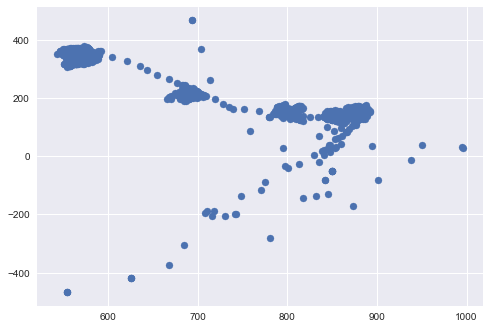

In [9]:
def extract_scene_eyegaze(df_movie, df_eyegaze, scene_num):
    """
    Extracts indices of df_eyegaze based on scene number

    Args:
        df_movie ([type]): [description]
        df_eyegaze ([type]): [description]
        scene_num ([int]): Scene number or row in movie transcript file

    Returns:
        x[array]: x coordinates during scene
        y[array]: y coordinates during scene
    """
    ind = np.where(np.logical_and(
        df_movie['start'].iloc[scene_num] < df_eyegaze['time'].values,
        df_movie['end'].iloc[scene_num] > df_eyegaze['time'].values
    ))

    return df_eyegaze['x'].iloc[ind], df_eyegaze['y'].iloc[ind]


scene = 1
x1, y1 = extract_scene_eyegaze(movdf, eyedf, scene)
plt.scatter(x1, y1)

In [18]:
np.sum(eyedf['frame'].values <= 27)

996